This is to develop some test cases for the PAL function. 

In [61]:
import matplotlib.pyplot as plt 
%matplotlib inline 

%load_ext autoreload
%autoreload 2

2020-06-17 10:05:47,434 matplotlib.pyplot DEBUG    Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [62]:
from sklearn.datasets import make_regression

In [185]:
X,y =  make_regression(n_samples=100, n_features=2, n_informative=1, n_targets=1, noise=10)

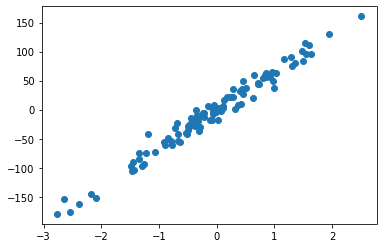

In [186]:
plt.scatter(X[:,0], y)

Here, there is one optimal point.

In [187]:
import sys

In [188]:
sys.path.append('../')

In [337]:
from dispersant_screener.pal import pal
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, RationalQuadratic, DotProduct
from sklearn.preprocessing import StandardScaler

In [338]:
gpr = GaussianProcessRegressor(kernel = RationalQuadratic() + DotProduct(), normalize_y=True, n_restarts_optimizer=10)

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
y = y.reshape(-1,1)

In [341]:
sc = StandardScaler()

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

In [343]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [344]:
pareto_optimal, hypervolumes = pal([gpr], X_train, y_train, X_test, y_test, hv_reference=[10])

2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the PAL loop
2020-06-17 11:46:47,826 root         INFO     Starting now the P

2020-06-17 11:46:47,885 root         DEBUG    Starting modeling step, fitting the GPs
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 11:46:48,171 root         DEBUG    MAE (train): 0.00, r2 (train): 1.00
2020-06-17 1

2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows shape (90, 1), rectangle ups shape (90, 1)
2020-06-17 11:46:48,229 root         DEBUG    rectangle lows sha

In [345]:
np.where(np.array(pareto_optimal)==1)[0][0]

55

In [351]:
y_test[55]

array([160.8238685])

In [352]:
np.max(y_test)

160.82386849946823

In [353]:
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RationalQuadratic(alpha=1, length_scale=1) + DotProduct(sigma_0=1),
                         n_restarts_optimizer=10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [354]:
y_pred = gpr.predict(X_test)

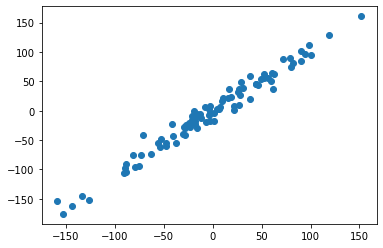

In [355]:
plt.scatter(y_pred, y_test)